<a href="https://colab.research.google.com/github/nephelim74/PythonDS/blob/main/DZ7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [2]:
!pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [1]:
!pip install bayesian-optimization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import warnings

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from bayes_opt import BayesianOptimization


## Загрузка данных

In [4]:
df  = pd.read_excel('fetch_california_housing.xlsx')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


1. MedInc: Средний доход на семью (float64).

2. HouseAge: Средний возраст домов (int64).

3. AveRooms: Среднее количество комнат в домах (float64).

4. AveBedrms: Среднее количество спален (float64).

5. Population: Общее количество жителей (int64).

6. AveOccup: Среднее количество людей в доме (float64).

7. Latitude: Широта местоположения (float64).

8. Longitude: Долгота местоположения (float64).

9. target: Средняя цена жилья (float64, целевая переменная для предсказания).

Этот датасет используется для анализа и предсказания цен на жилье в Калифорнии.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  int64  
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  int64  
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [6]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
print(df.isnull().sum())


Размер датасета: (20640, 9)
Пропущенные значения:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


## EDA

In [7]:
df.describe().T.style.background_gradient(cmap='YlOrRd')


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.000000,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.000000,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.000000,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.000000,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.000000,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.000000,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.000000,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.000000,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.000000,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


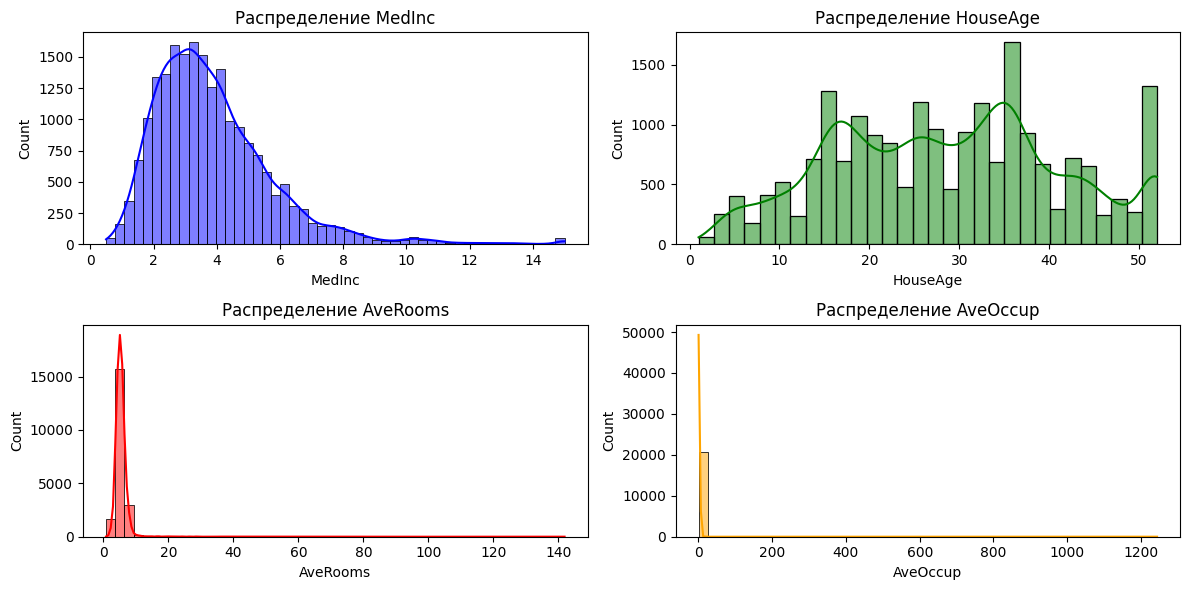

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['MedInc'], bins=50, kde=True, color='blue')
plt.title('Распределение MedInc')

plt.subplot(2, 2, 2)
sns.histplot(df['HouseAge'], bins=30, kde=True, color='green')
plt.title('Распределение HouseAge')

plt.subplot(2, 2, 3)
sns.histplot(df['AveRooms'], bins=50, kde=True, color='red')
plt.title('Распределение AveRooms')

plt.subplot(2, 2, 4)
sns.histplot(df['AveOccup'], bins=50, kde=True, color='orange')
plt.title('Распределение AveOccup')

plt.tight_layout()
plt.show()



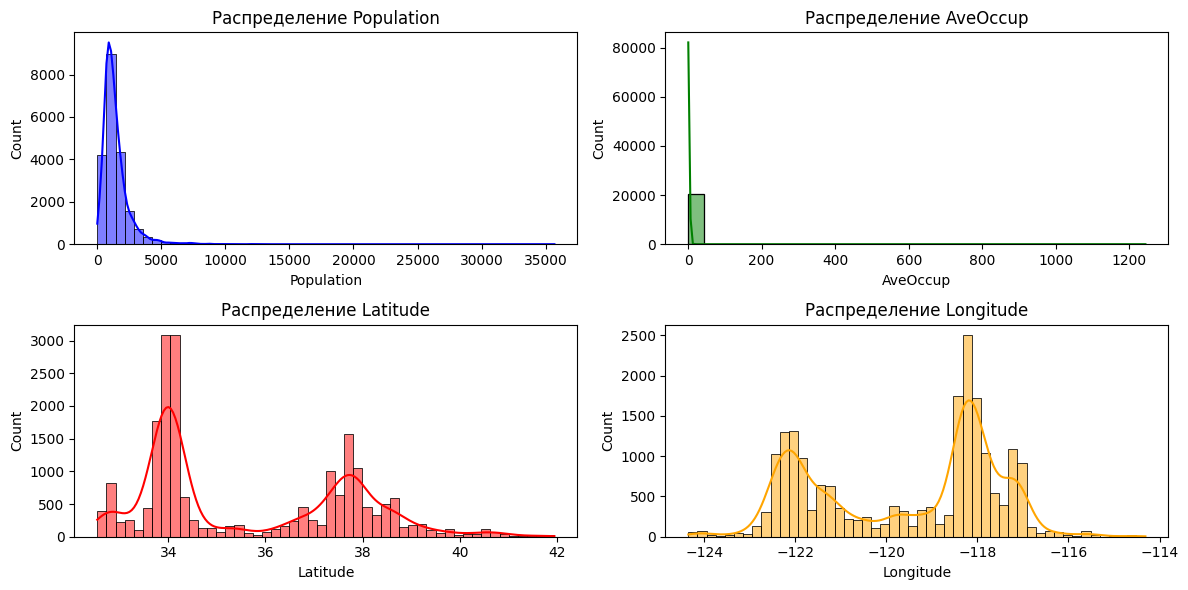

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Population'], bins=50, kde=True, color='blue')
plt.title('Распределение Population')

plt.subplot(2, 2, 2)
sns.histplot(df['AveOccup'], bins=30, kde=True, color='green')
plt.title('Распределение AveOccup')

plt.subplot(2, 2, 3)
sns.histplot(df['Latitude'], bins=50, kde=True, color='red')
plt.title('Распределение Latitude')

plt.subplot(2, 2, 4)
sns.histplot(df['Longitude'], bins=50, kde=True, color='orange')
plt.title('Распределение Longitude')

plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Распределение target')

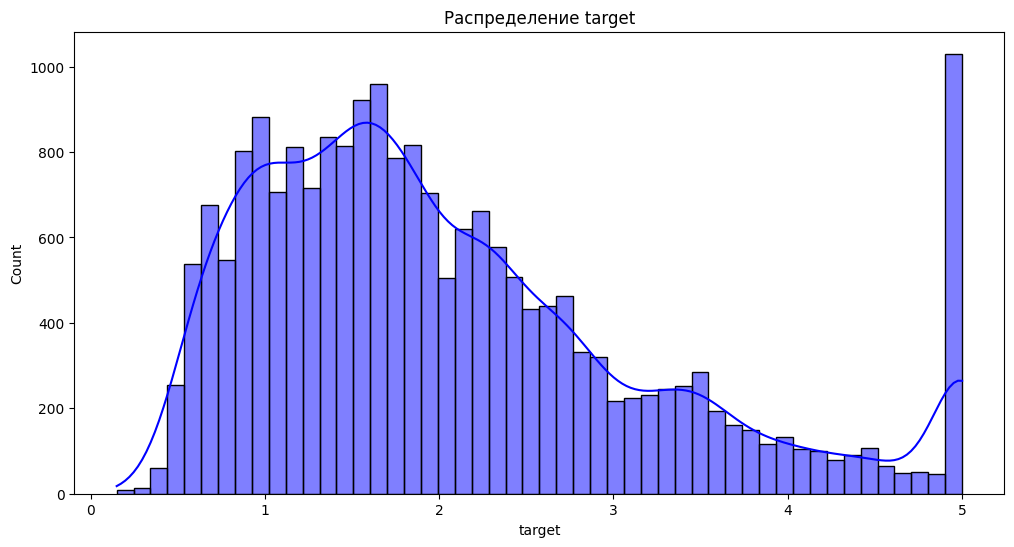

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['target'], bins=50, kde=True, color='blue')
plt.title('Распределение target')


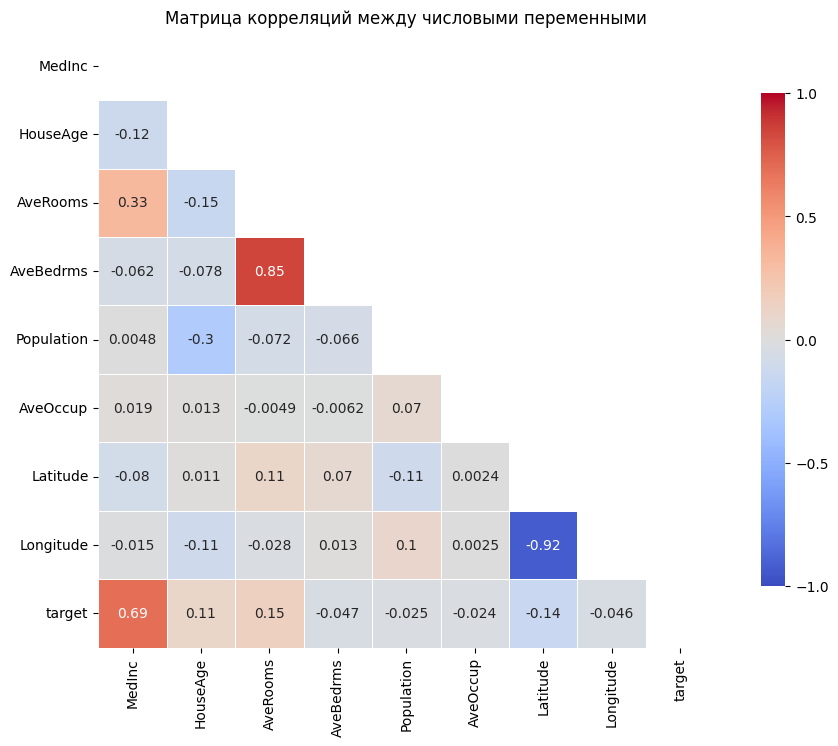

In [10]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()


## Подготовка данных к обучению

In [11]:
# Разделение данных на признаки и целевую переменную:
X = df.drop(columns=['target'])
y = df['target']
#Разделение данных на обучающую и тестовую выборки:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер X_train: {len(X_train)}")
print(f"Размер X_test: {len(X_test)}")
print(f"Размер y_train: {len(y_train)}")
print(f"Размер y_test: {len(y_test)}")


Размер X_train: 16512
Размер X_test: 4128
Размер y_train: 16512
Размер y_test: 4128


## Поиск лучшей модели RandomForestRegressor

In [12]:
# Функция для кросс-валидации при обучении модели
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
  #  Эта функция принимает параметры для настройки модели RandomForestRegressor и выполняет кросс-валидацию для оценки производительности модели.
  # Преобразование параметров:
    n_estimators = int(n_estimators)
    max_depth = None if int(max_depth) == 0 else int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    max_features = float(max_features)
    # Созание модели:
    model = RandomForestRegressor( # Создается объект RandomForestRegressor с заданными параметрами
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    # Кросс-валидация
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    #  Используется функция cross_val_score для выполнения 5-кратной кросс-валидации (cv=5).
    # Оценка модели производится по метрике отрицательной средней квадратичной ошибки (MSE).
    # Значение MSE возвращается как отрицательное, поэтому для получения RMSE (корень из MSE) нужно будет взять отрицательное значение.

    # Возвращаем среднее значение RMSE
    return scores.mean()

# Определение пространства параметров для байесовской оптимизации
param_bounds = {
    # Здесь задается пространство параметров для байесовской оптимизации, где для каждого параметра указаны его минимальные и максимальные значения.
    'n_estimators': (100, 300),
    'max_depth': (0, 30),  # 0 означает None
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'max_features': (0.1, 1.0)  # Пропорция от числа признаков
}

optimizer = BayesianOptimization(
    # Создается объект BayesianOptimization, который будет использовать функцию rf_cv для оптимизации параметров. pbounds определяет границы параметров.
    f=rf_cv,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=10, n_iter=30)
# Запускается процесс оптимизации. init_points=10 означает, что 10 начальных точек будут случайно выбраны для исследования пространства параметров,
# а n_iter=30 указывает, что будет проведено 30 итераций оптимизации.
best_params_rf = optimizer.max['params']
best_params_rf['n_estimators'] = int(best_params_rf['n_estimators'])
best_params_rf['max_depth'] = None if int(best_params_rf['max_depth']) == 0 else int(best_params_rf['max_depth'])
best_params_rf['min_samples_split'] = int(best_params_rf['min_samples_split'])
best_params_rf['min_samples_leaf'] = int(best_params_rf['min_samples_leaf'])
best_params_rf['max_features'] = float(best_params_rf['max_features'])
#  Извлекаются лучшие параметры из результатов оптимизации, и они преобразуются в нужные типы.


best_model_rf = RandomForestRegressor(
    # Создается и обучается модель RandomForestRegressor с лучшими найденными параметрами.
    **best_params_rf,
    random_state=42,
    n_jobs=-1
)
best_model_rf.fit(X_train, y_train) # Обучение модели с лучшими параметрами

#  Оценка модели на обучающей выборке
best_train_preds_rf = best_model_rf.predict(X_train) #  здесь модель делает предсказания на обучающей выборке X_train.
# best_train_rmse_rf = mean_squared_error(y_train, best_train_preds_rf, squared=False)
best_train_rmse_rf = np.sqrt(mean_squared_error(y_train, best_train_preds_rf))
# функция mean_squared_error используется для вычисления корня из средней квадратичной ошибки (RMSE) между истинными значениями y_train и предсказанными значениями best_train_preds_rf.
# Параметр squared=False указывает, что мы хотим получить RMSE, а не MSE.
print(f"Лучшие параметры RandomForestRegressor: {best_params_rf}") # выводит найденные лучшие параметры для модели RandomForestRegressor.
print(f"RMSE на обучающей выборке с лучшими параметрами: {best_train_rmse_rf:.2f}") # выводит значение RMSE на обучающей выборке с использованием лучших парамет ров, округленное до двух знаков после запятой.

# В целом, этот код выполняет следующие шаги:

# 1. Определяет функцию для кросс-валидации модели RandomForestRegressor.

# 2. Задает пространство параметров для байесовской оптимизации.

# 3. Инициализирует и запускает байесовскую оптимизацию для нахождения лучших параметров.

# 4. Обучает модель с найденными параметрами.

# 5. Оценивает производительность модели на обучающей выборке и выводит результаты.

# Этот процесс позволяет найти оптимальные гиперпараметры для модели, что может значительно улучшить ее производительность.


|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | -0.2775   | 11.24     | 0.9556    | 3.196     | 6.789     | 131.2     |
| 2         | -0.7559   | 4.68      | 0.1523    | 3.599     | 6.809     | 241.6     |
| 3         | -0.2606   | 0.6175    | 0.9729    | 3.497     | 3.699     | 136.4     |
| 4         | -0.4907   | 5.502     | 0.3738    | 2.574     | 5.456     | 158.2     |
| 5         | -0.2938   | 18.36     | 0.2255    | 1.876     | 4.931     | 191.2     |
| 6         | -0.2538   | 23.56     | 0.2797    | 2.543     | 6.739     | 109.3     |
| 7         | -0.2528   | 18.23     | 0.2535    | 1.195     | 9.591     | 293.1     |
| 8         | -0.2505   | 24.25     | 0.3742    | 1.293     | 7.474     | 188.0     |
| 9         | -0.5883   | 3.661     | 0.5457    | 1.103     | 9.275     | 151.8     |
| 10        | -0.2495   | 19.88     | 0.3805    | 2.56

1. max_depth: None  
   Это означает, что глубина деревьев в лесу не ограничена. В случае, если глубина не ограничена, деревья могут расти до тех пор, пока не достигнут минимального числа образцов в узле (параметр min_samples_split). Это может привести к переобучению, особенно если данные имеют шум. Однако в некоторых случаях это может быть полезно, если данные сложные и требуют глубокой модели для захвата всех паттернов.

2. max_features: 0.33782290313616253  
   Этот параметр указывает, что при построении каждого дерева в лесу будет использоваться примерно 33.8% признаков. Это позволяет снизить корреляцию между деревьями и, как следствие, улучшить обобщающую способность модели. Важно выбирать оптимальное количество признаков, чтобы сбалансировать между переобучением и недообучением.

3. min_samples_leaf: 1  
   Этот параметр определяет минимальное количество образцов, необходимых для того, чтобы узел стал листом. Значение 1 означает, что в узле может находиться только один образец. Это может привести к созданию очень сложных деревьев, что опять же может повысить риск переобучения. В общем случае, увеличение этого параметра может помочь в снижении переобучения.

4. min_samples_split: 2  
   Этот параметр указывает минимальное количество образцов, необходимое для разделения узла. Значение 2 является минимальным и означает, что узел будет разделен, если в нем есть хотя бы два образца. Это также может привести к созданию более сложных деревьев, если данные имеют много шумов.

5. n_estimators: 299  
   Этот параметр определяет количество деревьев в лесу. Значение 299 достаточно высокое и может помочь улучшить стабильность и точность модели, так как большее количество деревьев обычно приводит к меньшей дисперсии. Однако стоит помнить, что увеличение числа деревьев увеличивает время обучения и предсказания.

▎Общий комментарий

RMSE (корень из среднеквадратичной ошибки) на обучающей выборке равен 0.18, что может указывать на хорошую производительность модели на обучающем наборе данных. Однако стоит также проверить RMSE на валидационной или тестовой выборке, чтобы убедиться, что модель не переобучилась и имеет хорошую обобщающую способность. Если RMSE на тестовой выборке значительно выше, это может быть признаком переобучения.


In [13]:
best_train_r2_rf = r2_score(y_train, best_train_preds_rf)
print(f"R² на обучающей выборке с лучшими параметрами: {best_train_r2_rf:.2f}")


R² на обучающей выборке с лучшими параметрами: 0.98


 это хороший результат, но важно убедиться, что модель действительно хорошо обобщается и не переобучена.

## Поиск лучшей модели GradientBoostingRegressor

In [14]:
# Функция для кросс-валидации при обучении модели
def gbr_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, learning_rate):
    n_estimators = int(n_estimators)
    max_depth = None if int(max_depth) == 0 else int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    max_features = float(max_features)
    learning_rate = float(learning_rate)

    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        learning_rate=learning_rate,
        random_state=42
    )

    # Кросс-валидация
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
    # Возвращаем среднее значение отрицательной RMSE
    return scores.mean()

# Определение пространства параметров для байесовской оптимизации
param_bounds = {
    'n_estimators': (100, 300),
    'max_depth': (1, 30),  # Минимальная глубина 1, так как 0 не имеет смысла
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'max_features': (0.1, 1.0),  # Пропорция от числа признаков
    'learning_rate': (0.01, 0.3)  # Скорость обучения
}

# Создание объекта BayesianOptimization
optimizer = BayesianOptimization(
    f=gbr_cv,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=2, n_iter=3)
best_params_gbr = optimizer.max['params']
best_params_gbr['n_estimators'] = int(best_params_gbr['n_estimators'])
best_params_gbr['max_depth'] = int(best_params_gbr['max_depth'])
best_params_gbr['min_samples_split'] = int(best_params_gbr['min_samples_split'])
best_params_gbr['min_samples_leaf'] = int(best_params_gbr['min_samples_leaf'])
best_params_gbr['max_features'] = float(best_params_gbr['max_features'])
best_params_gbr['learning_rate'] = float(best_params_gbr['learning_rate'])

# Обучение модели с лучшими параметрами
best_model_gbr = GradientBoostingRegressor(
    **best_params_gbr,
    random_state=42
)
best_model_gbr.fit(X_train, y_train)
best_train_preds_gbr = best_model_gbr.predict(X_train)
best_train_rmse_gbr = np.sqrt(mean_squared_error(y_train, best_train_preds_gbr))
# best_train_rmse_gbr = mean_squared_error(y_train, best_train_preds_gbr, squared=False)
print(f"Лучшие параметры GradientBoostingRegressor: {best_params_gbr}")
print(f"RMSE на обучающей выборке с лучшими параметрами: {best_train_rmse_gbr:.2f}")


|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------
| 1         | -0.278    | 0.1186    | 28.57     | 0.7588    | 2.796     | 3.248     | 131.2     |
| 2         | -0.2497   | 0.02684   | 26.12     | 0.641     | 3.124     | 2.165     | 294.0     |
| 3         | -0.2768   | 0.2223    | 26.37     | 0.6893    | 3.437     | 2.963     | 293.7     |
| 4         | -0.2652   | 0.04602   | 21.67     | 0.7666    | 1.469     | 7.071     | 277.0     |
| 5         | -0.2412   | 0.03374   | 25.7      | 0.4369    | 2.794     | 2.121     | 293.8     |
Лучшие параметры GradientBoostingRegressor: {'learning_rate': 0.03373592561076987, 'max_depth': 25, 'max_features': 0.43688443839905855, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 293}
RMSE на обучающей выборке с лучшими параметрами: 0.00


1. Параметры модели:

   • learning_rate: 0.0337 — это довольно низкий коэффициент обучения, что может помочь модели более аккуратно подходить к минимизации функции потерь, но требует большего числа деревьев (n_estimators).

   • max_depth: 25 — это очень глубокие деревья, которые могут привести к переобучению, если данные не являются достаточно большими или разнообразными.

   • max_features: 0.4369 — это указывает на то, что модель использует около 43.69% признаков для построения каждого дерева, что может помочь в уменьшении переобучения.

   • min_samples_leaf: 2 — это значение указывает на минимальное количество образцов, необходимых для листа. Низкое значение может привести к созданию более сложных деревьев.

   • min_samples_split: 2 — это минимальное количество образцов, необходимых для разделения узла, что также может привести к более сложным деревьям.

   • n_estimators: 293 — это довольно высокое количество деревьев, что может быть оправдано низким значением learning_rate.

2. RMSE на обучающей выборке: 0.00 — это вызывает определенные опасения. Если RMSE (корень из средней квадратичной ошибки) равен нулю, это может указывать на то, что модель идеально подогнала данные обучающей выборки. Это может быть признаком переобучения, особенно если модель показывает такие результаты на тестовой выборке.

В общем, хотя параметры модели выглядят разумно, нулевой RMSE на обучающей выборке может означать, что модель не обобщает данные хорошо и может не работать так же хорошо на новых, невидимых данных. Рекомендуется проверить производительность модели на валидационной или тестовой выборке, чтобы убедиться, что она действительно обучилась хорошо и не переобучилась.

In [15]:
best_train_r2_gbr = r2_score(y_train, best_train_preds_gbr)
print(f"R² на обучающей выборке с лучшими параметрами: {best_train_r2_gbr:.2f}")


R² на обучающей выборке с лучшими параметрами: 1.00


  С учетом того, что R²  = 1 (например, 0.99 или выше), а RMSE на обучающей выборке равен 0, похоже на то, что модель переобучилась

## Сравнение моделей на тестовой выборке

In [16]:
test_preds_rf = best_model_rf.predict(X_test)
# Здесь best_model_rf — это ваша оптимизированная модель RandomForestRegressor, и используем метод predict для получения предсказаний на тестовой выборке X_test.
# Результаты сохраняются в переменной test_preds_rf.
test_rmse_rf = mean_squared_error(y_test, test_preds_rf)
# Здесь используется функция mean_squared_error для вычисления средней квадратичной ошибки (RMSE)
# между истинными значениями y_test и предсказаниями test_preds_rf. Результат сохраняется в переменной test_rmse_rf.
test_r2_rf = r2_score(y_test, test_preds_rf)
# Здесь используется функция r2_score для вычисления коэффициента детерминации  R²  между истинными значениями y_test и предсказаниями test_preds_rf.
# Результат сохраняется в переменной test_r2_rf.
print(f"RandomForestRegressor - RMSE на тестовой выборке: {test_rmse_rf:.2f}")
print(f"RandomForestRegressor - R² на тестовой выборке: {test_r2_rf:.2f}")
# Здесь выводятся значения RMSE и  R²  для модели RandomForestRegressor на тестовой выборке с форматированием до двух знаков после запятой.

# Код повторяется для модели GradientBoostingRegressor
test_preds_gbr = best_model_gbr.predict(X_test)
test_rmse_gbr = mean_squared_error(y_test, test_preds_gbr)
test_r2_gbr = r2_score(y_test, test_preds_gbr)
print(f"GradientBoostingRegressor - RMSE на тестовой выборке: {test_rmse_gbr:.2f}")
print(f"GradientBoostingRegressor - R² на тестовой выборке: {test_r2_gbr:.2f}")


RandomForestRegressor - RMSE на тестовой выборке: 0.24
RandomForestRegressor - R² на тестовой выборке: 0.81
GradientBoostingRegressor - RMSE на тестовой выборке: 0.23
GradientBoostingRegressor - R² на тестовой выборке: 0.82


На основе представленных результатов можно сделать следующие выводы о производительности моделей RandomForestRegressor и GradientBoostingRegressor на тестовой выборке:

1. Сравнение RMSE:

   • RandomForestRegressor имеет RMSE (корень из среднеквадратичной ошибки) равный 0.24.

   • GradientBoostingRegressor имеет RMSE равный 0.23.

   • Поскольку RMSE у GradientBoostingRegressor ниже, это указывает на то, что эта модель в среднем делает более точные предсказания, чем RandomForestRegressor.

2. Сравнение R²:

   • RandomForestRegressor имеет R² (коэффициент детерминации) равный 0.81.

   • GradientBoostingRegressor имеет R² равный 0.82.

   • Более высокий R² у GradientBoostingRegressor также говорит о том, что эта модель лучше объясняет вариацию целевой переменной по сравнению с RandomForestRegressor.

3. Общие выводы:

   • Оба алгоритма показывают хорошую производительность, однако GradientBoostingRegressor демонстрирует лучшие результаты как по RMSE, так и по R².

   • Это может указывать на то, что градиентный бустинг лучше справляется с данной задачей регрессии и может быть предпочтительным выбором для данной конкретной модели.

4. Рекомендации:

   • Если цель состоит в том, чтобы добиться наилучших предсказаний, стоит рассмотреть использование GradientBoostingRegressor.



## Анализ важности признаков

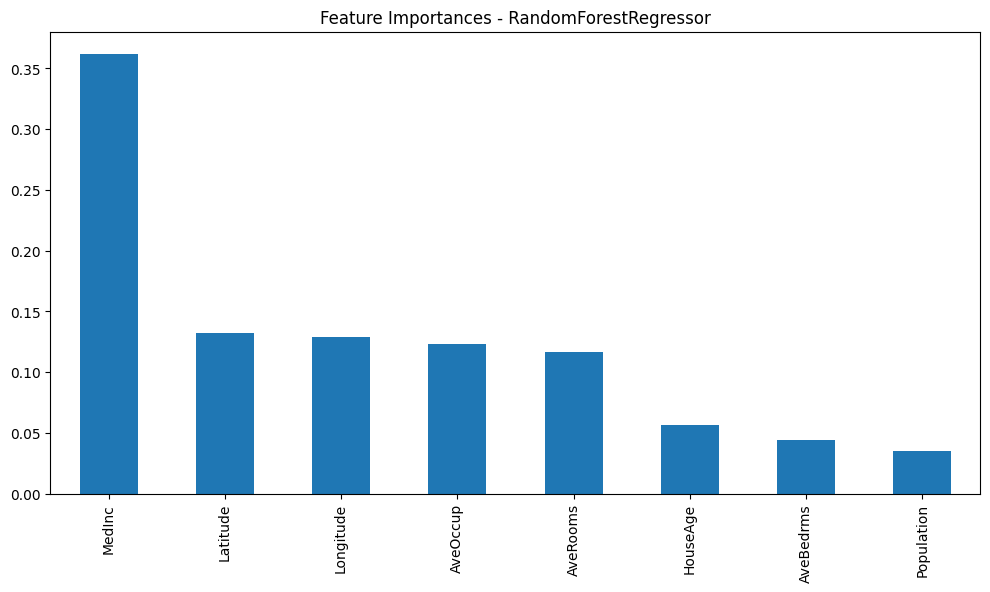

In [17]:
# Оценка важности признаков для RandomForestRegressor
importances_rf = best_model_rf.feature_importances_
features_rf = pd.Series(importances_rf, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
features_rf.plot(kind='bar')
plt.title('Feature Importances - RandomForestRegressor')
plt.show()


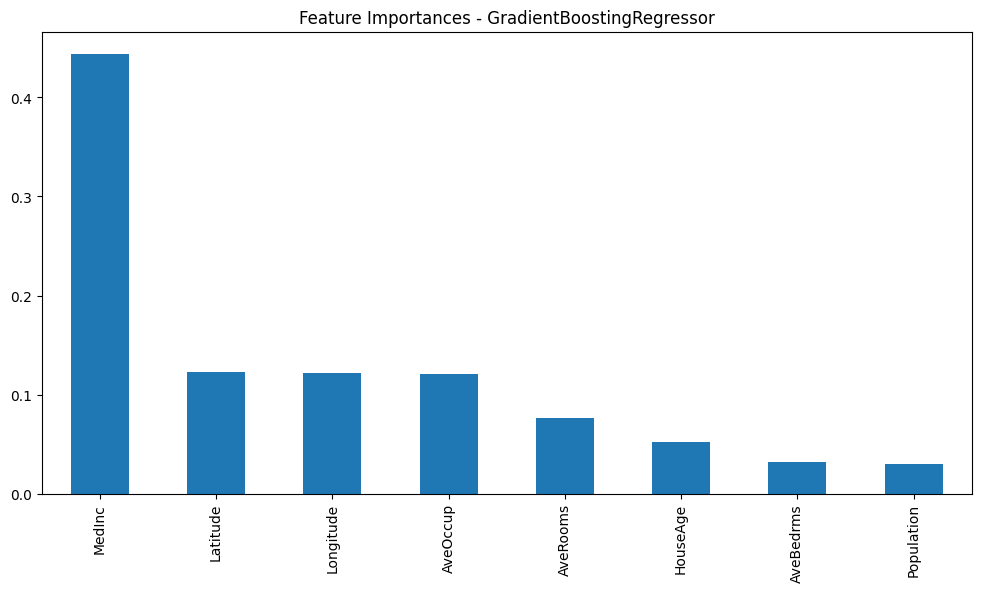

In [18]:
# Оценка важности признаков для GradientBoostingRegressor
importances_gbr = best_model_gbr.feature_importances_
features_gbr = pd.Series(importances_gbr, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
features_gbr.plot(kind='bar')
plt.title('Feature Importances - GradientBoostingRegressor')
plt.show()


## Исследование влияние удаления некоторых признаков на производительность моделей


In [19]:
# Подготовка даннных

# Удаление наиболее важных признаков
X_train_less_important = X_train.drop(columns=features_rf.head(3).index)
X_test_less_important = X_test.drop(columns=features_rf.head(3).index)

# Удаление наименее важных признаков
X_train_more_important = X_train.drop(columns=features_rf.tail(3).index)
X_test_more_important = X_test.drop(columns=features_rf.tail(3).index)

print(f"Размер X_train_less_important: {len(X_train_less_important)}")
print(f"Размер X_test_less_important: {len(X_test_less_important)}")
print(f"Размер X_train_more_important: {len(X_train_more_important)}")
print(f"Размер X_test_more_important: {len(X_test_more_important)}")
print(f"Размер y_train: {len(y_train)}")
print(f"Размер y_test: {len(y_test)}")

Размер X_train_less_important: 16512
Размер X_test_less_important: 4128
Размер X_train_more_important: 16512
Размер X_test_more_important: 4128
Размер y_train: 16512
Размер y_test: 4128


In [20]:
# Переобучение моделей на данных с удаленными важными признаками

best_model_rf_less_important = RandomForestRegressor(
    **best_params_rf,
    random_state=42,
    n_jobs=-1
)
best_model_rf_less_important.fit(X_train_less_important, y_train)

best_model_gbr_less_important = GradientBoostingRegressor(
    **best_params_gbr,
    random_state=42
)
best_model_gbr_less_important.fit(X_train_less_important, y_train)


GradientBoostingRegressor(learning_rate=0.03373592561076987, max_depth=25,
                          max_features=0.43688443839905855, min_samples_leaf=2,
                          n_estimators=293, random_state=42)

In [21]:
# Переобучение моделей на данных с удаленными неважными признаками

best_model_rf_more_important = RandomForestRegressor(
    **best_params_rf,
    random_state=42,
    n_jobs=-1
)
best_model_rf_more_important.fit(X_train_more_important, y_train)

best_model_gbr_more_important = GradientBoostingRegressor(
    **best_params_gbr,
    random_state=42
)
best_model_gbr_more_important.fit(X_train_more_important, y_train)


GradientBoostingRegressor(learning_rate=0.03373592561076987, max_depth=25,
                          max_features=0.43688443839905855, min_samples_leaf=2,
                          n_estimators=293, random_state=42)

In [23]:
# Оценка моделей на тестовой выборке после удаления важных признаков
test_preds_rf_less_important = best_model_rf_less_important.predict(X_test_less_important)
test_rmse_rf_less_important = mean_squared_error(y_test, test_preds_rf_less_important)
test_r2_rf_less_important = r2_score(y_test, test_preds_rf_less_important)

test_preds_gbr_less_important = best_model_gbr_less_important.predict(X_test_less_important)
test_rmse_gbr_less_important = mean_squared_error(y_test, test_preds_gbr_less_important)
test_r2_gbr_less_important = r2_score(y_test, test_preds_gbr_less_important)

print("Удаление наиболее важных признаков:")
print(f"RandomForestRegressor - RMSE: {test_rmse_rf_less_important:.2f}, R²: {test_r2_rf_less_important:.2f}")
print(f"GradientBoostingRegressor - RMSE: {test_rmse_gbr_less_important:.2f}, R²: {test_r2_gbr_less_important:.2f}")


# Оценка моделей на тестовой выборке после удаления неважных признаков
test_preds_rf_more_important = best_model_rf_more_important.predict(X_test_more_important)
test_rmse_rf_more_important = mean_squared_error(y_test, test_preds_rf_more_important)
test_r2_rf_more_important = r2_score(y_test, test_preds_rf_more_important)

test_preds_gbr_more_important = best_model_gbr_more_important.predict(X_test_more_important)
test_rmse_gbr_more_important = mean_squared_error(y_test, test_preds_gbr_more_important)
test_r2_gbr_more_important = r2_score(y_test, test_preds_gbr_more_important)

print("\nУдаление наименее важных признаков:")
print(f"RandomForestRegressor - RMSE: {test_rmse_rf_more_important:.2f}, R²: {test_r2_rf_more_important:.2f}")
print(f"GradientBoostingRegressor - RMSE: {test_rmse_gbr_more_important:.2f}, R²: {test_r2_gbr_more_important:.2f}")#

# Код предназначен для оценки влияния удаления важных и неважных признаков на производительность моделей регрессии.
# Сравнение RMSE и R² позволяет понять, как изменение набора признаков влияет на точность предсказаний.

Удаление наиболее важных признаков:
RandomForestRegressor - RMSE: 0.78, R²: 0.40
GradientBoostingRegressor - RMSE: 0.82, R²: 0.38

Удаление наименее важных признаков:
RandomForestRegressor - RMSE: 0.25, R²: 0.81
GradientBoostingRegressor - RMSE: 0.24, R²: 0.82


На основе представленных результатов оценки моделей после удаления признаков можно сделать следующие выводы:

▎1. Удаление наиболее важных признаков:

• RandomForestRegressor:

  • RMSE: 0.78

  • R²: 0.40

  
• GradientBoostingRegressor:

  • RMSE: 0.82

  • R²: 0.38

▎Выводы:

• Оба алгоритма значительно ухудшили свою производительность после удаления наиболее важных признаков.

• RandomForestRegressor показал лучшее качество предсказания по сравнению с GradientBoostingRegressor (меньший RMSE и больший R²), но оба значения указывают на то, что модели не способны адекватно объяснить вариацию целевой переменной (R² значительно ниже 1).

• Это подтверждает важность сохранения наиболее значимых признаков для достижения хороших результатов в моделировании.

▎2. Удаление наименее важных признаков:

• RandomForestRegressor:

  • RMSE: 0.25

  • R²: 0.81

  
• GradientBoostingRegressor:

  • RMSE: 0.24

  • R²: 0.82

▎Выводы:

• В этом случае обе модели значительно улучшили свою производительность после удаления наименее важных признаков.

• GradientBoostingRegressor имеет немного лучший RMSE и R², чем RandomForestRegressor, что указывает на то, что он лучше справляется с задачей предсказания в данной конфигурации.

• Высокие значения R² (близкие к 1) и низкие значения RMSE указывают на то, что модели хорошо объясняют вариацию целевой переменной и делают точные предсказания.

▎Общие выводы:

• Удаление наиболее важных признаков значительно ухудшает качество предсказаний, что подчеркивает их важность для моделей.

• Удаление наименее важных признаков, наоборот, приводит к улучшению качества предсказаний, что может свидетельствовать о том, что эти признаки не вносили значительного вклада в модель.

• В целом, результаты показывают, что правильный выбор признаков является ключевым аспектом в построении эффективных моделей машинного обучения.